In [1]:
# 구현에 사용할 패키지 임포트하기
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

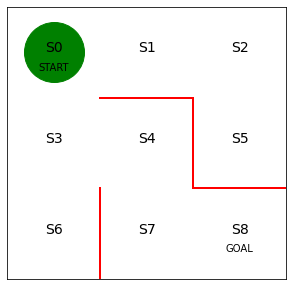

In [2]:
# 초기 상태의 미로 모습

# 전체 그림의 크기 및 그림을 나타내는 변수 선언
fig = plt.figure(figsize=(5, 5))
ax = plt.gca()

# 붉은 벽 그리기
plt.plot([1, 1], [0, 1], color='red', linewidth=2)
plt.plot([1, 2], [2, 2], color='red', linewidth=2)
plt.plot([2, 2], [2, 1], color='red', linewidth=2)
plt.plot([2, 3], [1, 1], color='red', linewidth=2)

# 상태를 의미하는 문자열(S0~S8) 표시
plt.text(0.5, 2.5, 'S0', size=14, ha='center')
plt.text(1.5, 2.5, 'S1', size=14, ha='center')
plt.text(2.5, 2.5, 'S2', size=14, ha='center')
plt.text(0.5, 1.5, 'S3', size=14, ha='center')
plt.text(1.5, 1.5, 'S4', size=14, ha='center')
plt.text(2.5, 1.5, 'S5', size=14, ha='center')
plt.text(0.5, 0.5, 'S6', size=14, ha='center')
plt.text(1.5, 0.5, 'S7', size=14, ha='center')
plt.text(2.5, 0.5, 'S8', size=14, ha='center')
plt.text(0.5, 2.3, 'START', ha='center')
plt.text(2.5, 0.3, 'GOAL', ha='center')

# 그림을 그릴 범위 및 눈금 제거 설정
ax.set_xlim(0, 3)
ax.set_ylim(0, 3)
plt.tick_params(axis='both', which='both', bottom=False, top=False,
                labelbottom=False, right=False, left=False, labelleft=False)

# S0에 녹색 원으로 현재 위치를 표시
line, = ax.plot([0.5], [2.5], marker="o", color='g', markersize=60)

In [3]:
# 정책을 결정하는 파라미터의 초깃값 theta_0를 설정

# 줄은 상태 0~7, 열은 행동방향(상,우,하,좌 순)를 나타낸다.
theta_0 = np.array([[np.nan, 1, 1, np.nan],     # s0
                    [np.nan, 1, np.nan, 1],     # s1
                    [np.nan, np.nan, 1, 1],     # s2
                    [1, 1, 1, np.nan],          # s3
                    [np.nan, np.nan, 1, 1],     # s4
                    [1, np.nan, np.nan, np.nan],# s5
                    [1, np.nan, np.nan, np.nan],# s6
                    [1, 1, np.nan, np.nan],     # s7
                    ])                          # s8은 목표지점이므로 정책이 없다 

In [4]:
# 가치 반복 알고리즘에서 사용할 행동가치 함수를 표형식 표현으로 구현함
# 행은 상태 s, 열은 행동 a를 나타내는 형태 -> 행동가치 함수 Q(s,a)
# 실제 행동가치는 우리가 알 수 없으므로 초기 상태로 난수값을 부여함
# 행동가치 함수 Q의 초기 상태

[a,b] = theta_0.shape  # 열과 행의 개수를 변수 a,b에 저장함
Q = np.random.rand(a,b)*theta_0  # theta_0를 곱하는 이유 : 난수 중에 벽에 해당하는 부분을 np.nan으로 바꿔주기 위함임
#                                  *theta_0으로 요소 단위 곱셈을 수행함 -> Q에서 벽 방향으로 이동하는 행동에는 nan을 부여함
'''
각 시각에서 행동가치 함수 Q에서 행동 a를 계산하기 위한 정책을 구현함
단순하게 생각하면 Q 값이 최대가 되는 행동을 고르기만 하면 됨(탐욕적 전략)

그러나, Q가 제대로 계산돼 있지 않은 상태에서 이런 전략을 취하면,
무작위로 생성한 행동가치 함수 Q의 초깃값에 따라 행동이 결정되며, 그 뒤로 학습이 제대로 이루어지지 않을 가능성이 있음
따라서, 일정 확률 epsilon 으로 무작위 행동을 취하고,
나머지 확률 1-epsilon으로 행동가치 Q가 최대가 되는 행동을 취하기로 함(epsilon-greedy 전략)
이때 epsilon 값은 시행 회차가 늘어남에 따라 작아지게 함

가치반복 알고리즘에서는 이용, 탐색을 적절히 섞어야 함 -> 탐색-이용 트레이드오프(explore-exploit tradeoff)
이용(exploit) : 현재 행동가치 함수의 최댓값을 이용해 행동을 결정하는 방법
탐색(explore) : 무작위로 행동을 선택하는 방법
'''

'\n각 시각에서 행동가치 함수 Q에서 행동 a를 계산하기 위한 정책을 구현함\n단순하게 생각하면 Q 값이 최대가 되는 행동을 고르기만 하면 됨(탐욕적 전략)\n\n그러나, Q가 제대로 계산돼 있지 않은 상태에서 이런 전략을 취하면,\n무작위로 생성한 행동가치 함수 Q의 초깃값에 따라 행동이 결정되며, 그 뒤로 학습이 제대로 이루어지지 않을 가능성이 있음\n따라서, 일정 확률 epsilon 으로 무작위 행동을 취하고,\n나머지 확률 1-epsilon으로 행동가치 Q가 최대가 되는 행동을 취하기로 함(epsilon-greedy 전략)\n이때 epsilon 값은 시행 회차가 늘어남에 따라 작아지게 함\n\n가치반복 알고리즘에서는 이용, 탐색을 적절히 섞어야 함 -> 탐색-이용 트레이드오프(explore-exploit tradeoff)\n이용(exploit) : 현재 행동가치 함수의 최댓값을 이용해 행동을 결정하는 방법\n탐색(explore) : 무작위로 행동을 선택하는 방법\n'

In [5]:
# 정책 파라미터 theta_0을 무작위 행동 정책 pi로 변환하는 함수

def simple_convert_into_pi_frome_theta(theta):
    '''단순 비율 계산'''
    
    [m,n] = theta.shape  # theta의 행렬 크기를 구함
    pi = np.zeros((m,n))
    
    for i in range(0,m):
        pi[i,:] = theta[i,:]/np.nansum(theta[i,:])  # 비율을 계산함
    
    pi = np.nan_to_num(pi)  # nan을 0으로 변환함
    
    return pi

# 무작위 행동정책 pi_0을 계산함
pi_0 = simple_convert_into_pi_frome_theta(theta_0)

In [6]:
# get_action : 행동을 결정하는 함수
# get_s_next : 행동을 인자로 받아 다음 상태를 구하는 함수
# epsilon-greedy 알고리즘을 구현함

def get_action(s,Q,epsilon,pi_0):
    direction = ["up", "right", "down", "left"]
    
    # 행동을 결정함
    if np.random.rand() < epsilon:
        # 확률 epsilon으로 무작위 행동을 선택함
        next_direction = np.random.choice(direction, p=pi_0[s,:])
    else:
        # Q값이 최대가 되는 행동을 선택함
        next_direction = direction[np.nanargmax(Q[s,:])]
        
    # 행동을 인덱스로 변환함
    if next_direction == "up":
        action = 0
    elif next_direction == "right":
        action = 1
    elif next_direction == "down":
        action = 2
    elif next_direction == "left":
        action = 3
    
    return action

def get_s_next(s,a,Q, epsilon, pi_0):
    direction = ["up", "right", "down", "left"]
    next_direction = direction[a]  # 행동 a의 방향
    
    # 행동으로 다음 상태를 결정함
    if next_direction == "up":
        s_next = s-3  # 위로 이동하면 상태값이 3만큼 줄어듦
    elif next_direction == "right":
        s_next = s+1  # 오른쪽으로 이동하면 상태값이 1만큼 늘어남
    elif next_direction == "down":
        s_next = s+3  # 아래로 이동하면 상태값이 3만큼 늘어남
    elif next_direction == "left":
        s_next = s-1  # 왼쪽으로 이동하면 상태값이 1만큼 줄어듦
    
    return s_next

In [7]:
# SARSA 알고리즘으로 행동가치 함수 Q를 수정함

def SARSA(s,a,r,s_next,a_next,Q,eta,gamma):
    if s_next == 8:  # 목표 지점에 도달한 경우
        Q[s,a] = Q[s,a] + eta*(r-Q[s,a])
    else:
        Q[s,a] = Q[s,a] + eta*(r + gamma*Q[s_next,a_next] - Q[s,a])
        
    return Q

In [8]:
# SARSA 알고리즘으로 미로를 빠져 나오는 함수
# 상태, 행동. Q값의 히스토리를 출력함
'''
SARSA 알고리즘을 사용해 미로를 빠져나오는 프로그램을 구현함
사용했던 정책경사 알고리즘과 달리, 가치반복 알고리즘에서는 가치함수를 매 시행 단위가 아니라 단계 단위로 수정함
  시행 : 시작 지점부터 목표 시점에 한번 다다르는 과정에 해당하는 1 에피소드
  단계 : 미로 안에서 한번 이동에 해당함
'''

def goal_maze_ret_s_a_Q(Q, epsilon, eta, gamma, pi):
    s = 0  # 시작 지점
    a = a_next = get_action(s,Q,epsilon,pi)  # 첫 번째 행동
    s_a_history = [[0, np.nan]]  # 에이전트의 행동 및 상태의 히스토리를 기록하는 리스트
    
    while(1):  # 목표 지점에 이를 때까지 반복함
        a = a_next  # 행동을 결정함
        
        s_a_history[-1][1] = a
        # 현재 상태(마지막이므로 인덱스가 -1임)를 히스토리에 추가함
        
        s_next = get_s_next(s,a,Q,epsilon,pi)
        # 다음 단계의 상태를 구함
        
        s_a_history.append([s_next, np.nan])
        # 다음 상태를 히스토리에 추가함
        # 행동은 아직 알 수 없으므로 nan으로 둠
        
        # 보상을 부여하고 다음 행동을 계산함
        if s_next == 8:
            r=1  # 목표 지점에 도달했다면 보상을 부여함
            a_next = np.nan
        else:
            r=0
            a_next = get_action(s_next, Q, epsilon, pi)
            # 다음 행동 a_next를 계산함
            
        # 가치함수를 수정함
        Q = SARSA(s,a,r,s_next,a_next,Q,eta,gamma)
        
        # 종료 여부를 판정함
        if s_next == 8:
            break
        else:
            s=s_next
        
    return [s_a_history,Q]

In [9]:
# SARSA 알고리즘으로 미로 빠져나오기

eta = 0.1      # 학습률
gamma = 0.9    # 시간할인율
epsilon = 0.5  # epsilon-greedy 알고리즘 epsilon 초기값
v = np.nanmax(Q, axis = 1)  # 각 상태마다 가치의 최댓값을 계산함
is_continue = True
episode = 1

while is_continue:  # is_continue 의 값이 False가 될 때까지 반복함
    print("에피소드 : " + str(episode))
    
    # epsiolon 값을 조금씩 감소시킴
    epsilon = epsilon/2
    
    # SARSA 알고리즘으로 미로를 빠져 나온 후, 결과로 나온 행동 히스토리와 Q 값을 변수에 저장함
    [s_a_history, Q] = goal_maze_ret_s_a_Q(Q,epsilon,eta,gamma,pi_0)
    
    # 상태가치의 변화
    new_v = np.nanmax(Q,axis=1)    # 각 상태마다 행동가치의 최댓값을 계산함
    print(np.sum(np.abs(new_v-v))) # 상태가치 함수의 변화를 출력함
    v=new_v
    print("목표 지점에 이르기까지 걸린 단계 수는 " + str(len(s_a_history)-1) + "단계입니다")
    
    # 100 에피소드를 반복함
    episode = episode + 1
    if episode > 100:
        break

에피소드 : 1
1.4182389253340852
목표 지점에 이르기까지 걸린 단계 수는 208단계입니다
에피소드 : 2
0.2395137020955776
목표 지점에 이르기까지 걸린 단계 수는 44단계입니다
에피소드 : 3
0.31721848564557176
목표 지점에 이르기까지 걸린 단계 수는 96단계입니다
에피소드 : 4
0.5770002841359216
목표 지점에 이르기까지 걸린 단계 수는 276단계입니다
에피소드 : 5
0.09291403702752044
목표 지점에 이르기까지 걸린 단계 수는 18단계입니다
에피소드 : 6
0.10063967311142036
목표 지점에 이르기까지 걸린 단계 수는 22단계입니다
에피소드 : 7
0.07563693593321502
목표 지점에 이르기까지 걸린 단계 수는 10단계입니다
에피소드 : 8
0.0740272054354853
목표 지점에 이르기까지 걸린 단계 수는 12단계입니다
에피소드 : 9
0.07284998812818122
목표 지점에 이르기까지 걸린 단계 수는 10단계입니다
에피소드 : 10
0.07153938328027543
목표 지점에 이르기까지 걸린 단계 수는 10단계입니다
에피소드 : 11
0.06023260464558322
목표 지점에 이르기까지 걸린 단계 수는 4단계입니다
에피소드 : 12
0.06829321976297797
목표 지점에 이르기까지 걸린 단계 수는 10단계입니다
에피소드 : 13
0.05772675652963294
목표 지점에 이르기까지 걸린 단계 수는 4단계입니다
에피소드 : 14
0.05714156312801982
목표 지점에 이르기까지 걸린 단계 수는 4단계입니다
에피소드 : 15
0.05650137595177007
목표 지점에 이르기까지 걸린 단계 수는 4단계입니다
에피소드 : 16
0.05580216928317405
목표 지점에 이르기까지 걸린 단계 수는 4단계입니다
에피소드 : 17
0.05504139541603764
목표 지점에 이르기까지 걸린 단계 수는 4단계입

In [10]:
# 에이전트의 이동을 애니메이션으로 시각화함
from matplotlib import animation
from IPython.display import HTML

def init():
    # 배경 이미지를 초기화함
    line.set_data([],[])
    return (line,)

def animate(i):
    # 프레임 단위로 이미지를 생성함
    state = s_a_history[i][0]  # 현재 위치
    x = (state%3) + 0.5        # 상태의 x좌표 : 3으로 나눈 나머지 + 0.5
    y = 2.5 - int(state/3)     # y좌표 : 2.5에서 3으로 나눈 몫을 뺌
    line.set_data(x,y)
    return (line,)

# 초기화 함수와 프레임 단위 이미지 생성 함수를 사용해 애니메이션을 생성함
anim = animation.FuncAnimation(fig, animate, init_func=init, frames=len(s_a_history), interval=200, repeat=False)

HTML(anim.to_jshtml())